# MACHINE LEARNING

## Final Practical

### Submitted To : Prof. Shifali Sharma
### Submitted To : Hrithik Johri (18BCS6145)

#### Importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("6.csv")

In [3]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
round((df.isnull().sum()/len(df)*100))

No                                        0.0
X1 transaction date                       0.0
X2 house age                              0.0
X3 distance to the nearest MRT station    0.0
X4 number of convenience stores           0.0
X5 latitude                               0.0
X6 longitude                              0.0
Y house price of unit area                0.0
dtype: float64

In [7]:
#Importing stats from scipy
from scipy import stats  
#Defining function for plotting numerical variables
def dist_plot(variable):
    plt.figure(figsize = (40,20))
    if(type(variable) is list):
        for i in variable:
            plt.subplot(5,7,variable.index(i)+1)
            sns.distplot(df[i])
            xt = plt.xticks()[0]  
            xmin, xmax = min(xt), max(xt)  
            lnspc = np.linspace(xmin, xmax, len(df[i]))
            m, s = stats.norm.fit(df[i])
            pdf_g = stats.norm.pdf(lnspc, m, s)
            plt.plot(lnspc, pdf_g, label="Norm")
    elif(type(variable) is str):
        sns.distplot(df[variable])
        plt.title(variable)
        xt = plt.xticks()[0]  
        xmin, xmax = min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(df[variable]))
        m, s = stats.norm.fit(df[variable])
        pdf_g = stats.norm.pdf(lnspc, m, s)
        plt.plot(lnspc, pdf_g, label="Norm")

In [8]:
#Creating a list of numerical Variables
numeric_variables = list(df.columns[df.dtypes != 'object'])

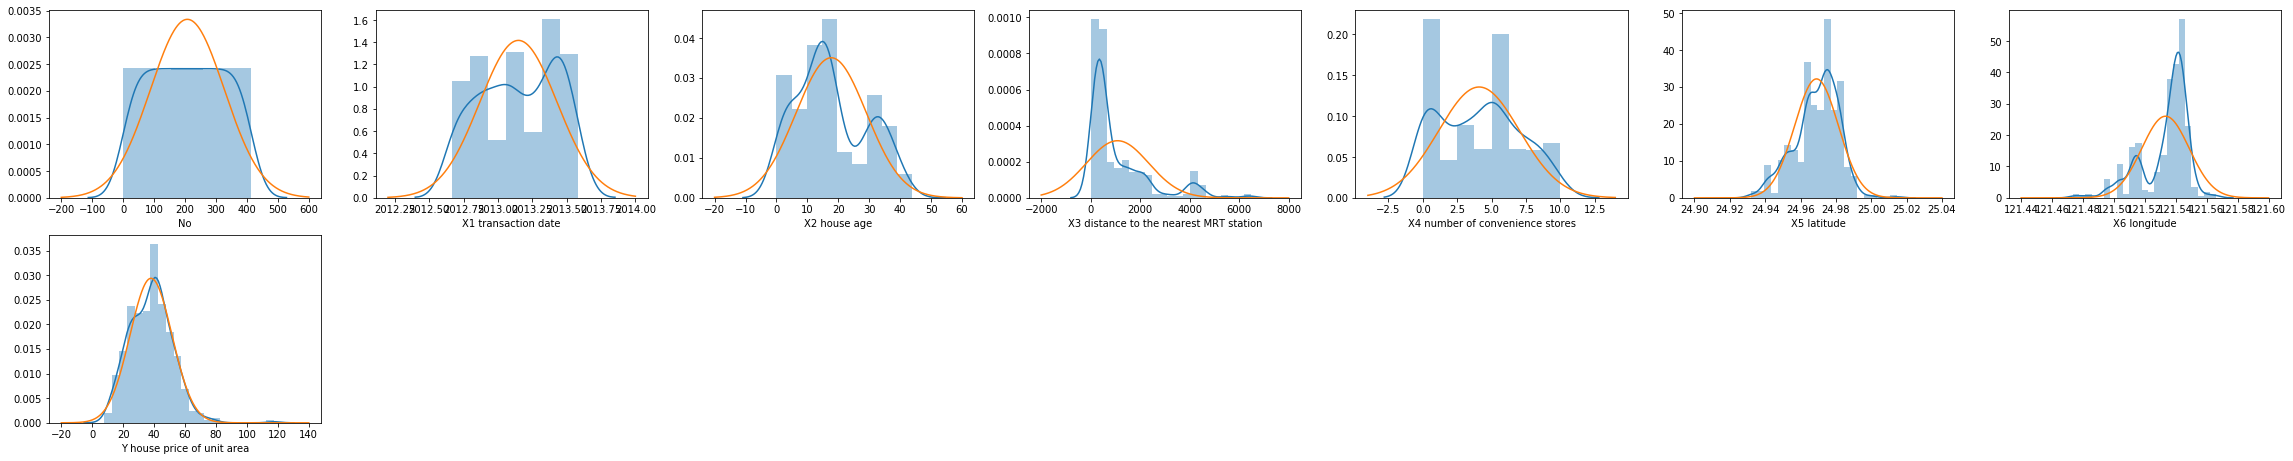

In [9]:
#Plotting for numerical variables
dist_plot(numeric_variables)

In [10]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print(IQR)

No                                         206.500000
X1 transaction date                          0.500000
X2 house age                                19.125000
X3 distance to the nearest MRT station    1164.954200
X4 number of convenience stores              5.000000
X5 latitude                                  0.014455
X6 longitude                                 0.015220
Y house price of unit area                  18.900000
dtype: float64


In [11]:
df = df[~((df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(371, 8)


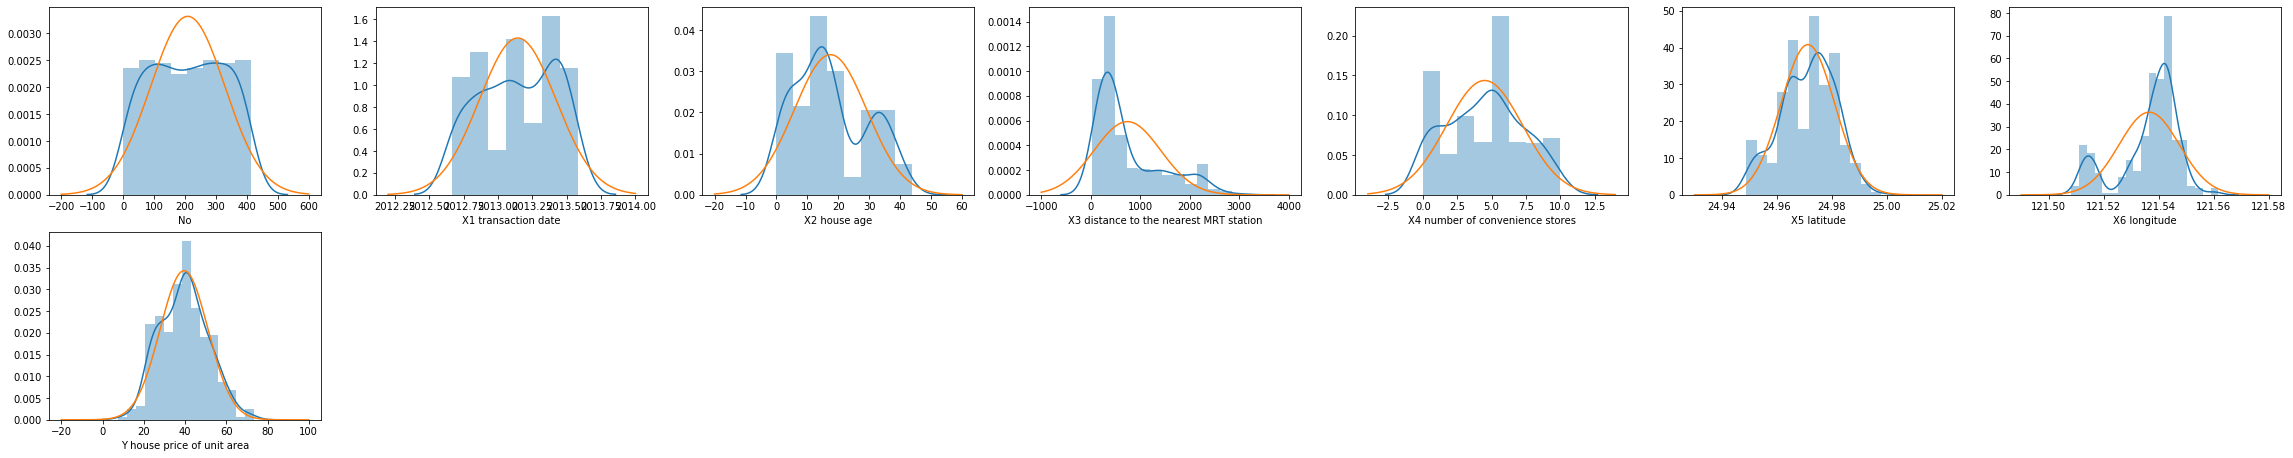

In [12]:
#Plotting for numerical variables
dist_plot(numeric_variables)

In [13]:
df = df.drop('No', axis=1)

In [14]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
408,2013.417,18.5,2175.74400,3,24.96330,121.51243,28.1
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [15]:
df = df.drop('X1 transaction date', axis=1)

In [16]:
df.shape

(371, 6)

In [17]:
Y = df.pop('Y house price of unit area')
X = df

In [18]:
X

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
408,18.5,2175.74400,3,24.96330,121.51243
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [19]:
Y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
408    28.1
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 371, dtype: float64

In [20]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [21]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [22]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.01}
-5.16541509740854


In [23]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001803,0.000753,0.001190,0.000972,0.0001,{'alpha': 0.0001},-4.256174,-6.212904,-4.932531,-5.818616,...,-5.193716,0.719533,3,-5.322391,-4.843053,-5.154935,-4.946989,-5.190152,-5.091504,0.173018
1,0.001398,0.000487,0.000597,0.000488,0.001,{'alpha': 0.001},-4.274047,-6.201020,-4.902154,-5.823662,...,-5.182428,0.719546,2,-5.308734,-4.837692,-5.148193,-4.941119,-5.184549,-5.084057,0.170774
2,0.001390,0.000494,0.000596,0.000487,0.01,{'alpha': 0.01},-4.427719,-6.184665,-4.772434,-5.908392,...,-5.165415,0.735745,1,-5.257623,-4.859728,-5.151902,-4.936764,-5.191443,-5.079492,0.153736
3,0.001587,0.000482,0.000603,0.000493,0.05,{'alpha': 0.05},-4.708949,-6.332718,-4.862063,-6.187963,...,-5.309216,0.792105,4,-5.370374,-5.032936,-5.313689,-5.062568,-5.371314,-5.230176,0.150696
4,0.001588,0.000482,0.000492,0.000620,0.1,{'alpha': 0.1},-4.800984,-6.397220,-4.922803,-6.299521,...,-5.383758,0.803708,5,-5.445759,-5.106722,-5.393377,-5.118173,-5.465275,-5.305861,0.159704


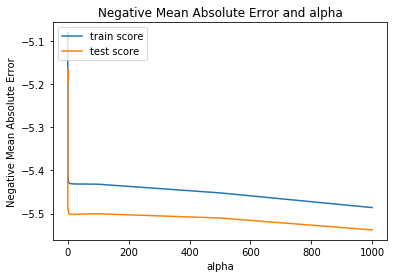

In [24]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [25]:
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.70003763e-01, -9.18924897e-03,  7.78974155e-01,  2.11372102e+02,
        1.82289875e+00])

In [26]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.6176640924231236


In [27]:
#Predicting basis on test dataset
y_pred = ridge.predict(X_test)

In [28]:
y_pred.shape

(112,)

In [29]:
y_test.shape

(112,)

Text(0, 0.5, 'y_pred')

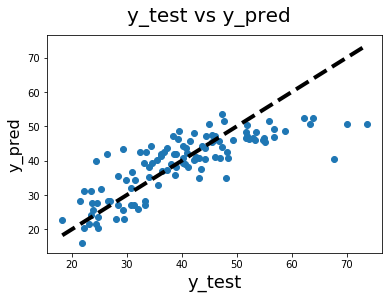

In [30]:
# Plotting y_test and y_pred to understand the spread
fig, ax = plt.subplots()
plt.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    